<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/02_Unsupervised_learning/05_UMAP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMAP (Uniform Manifold Approximation and Projection)
It is a nonlinear dimensionality reduction method that assumes your data lies on a curved surface (manifold) in high-dimensional space and tries to flatten it while keeping neighborhoods intact.

## Wokring of UMAP
1. **Find nearest neighbors.**
  
  For each point, find n_neighbors closest points.

  Choose a smooth distance threshold so the entropy of neighbor distances matches log2(𝑛_neighbors).

2. **Build high-dimensional graph**

  Convert distances to connection strengths and
  symmetrize the probabilities between pairs of points to form a fuzzy graph.


3. **Initialize low-dimensional layout**

  Start with random positions, PCA or use spectral embeddings.

4. **Optimize layout**

  Pull connected points together, push unconnected points apart.

  Minimize cross-entropy between the high-dimensional and low-dimensional graphs using stochastic gradient descent.



UMAP balances local + some global structure. Much faster than t-SNE, scalable to millions of points, can also embed new data without retraining.

[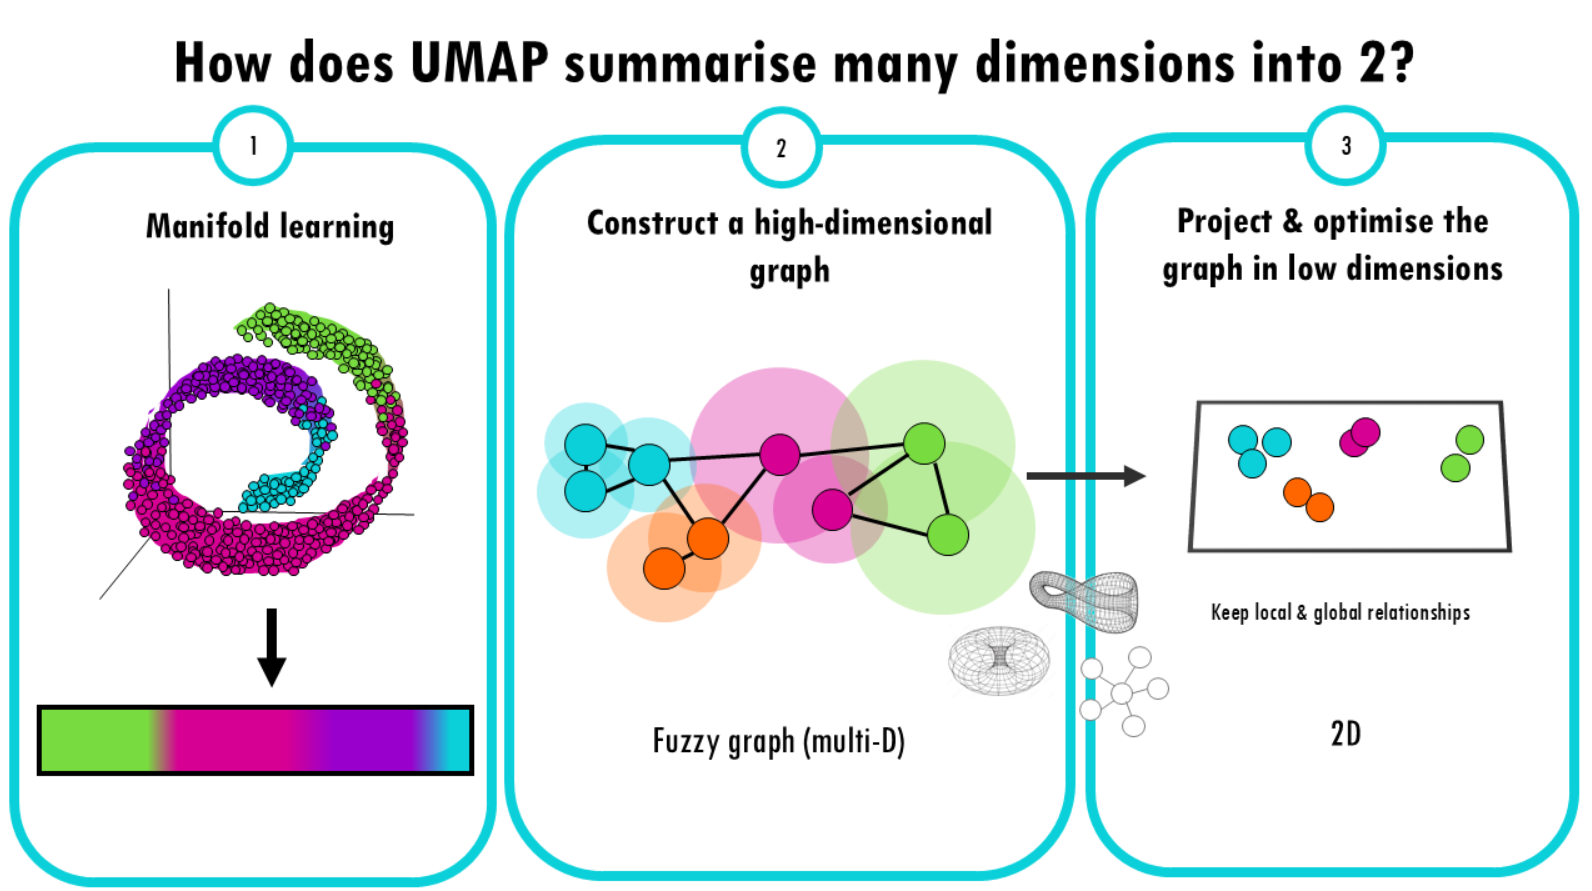](https://biostatsquid.com/umap-simply-explained/)


In [6]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()

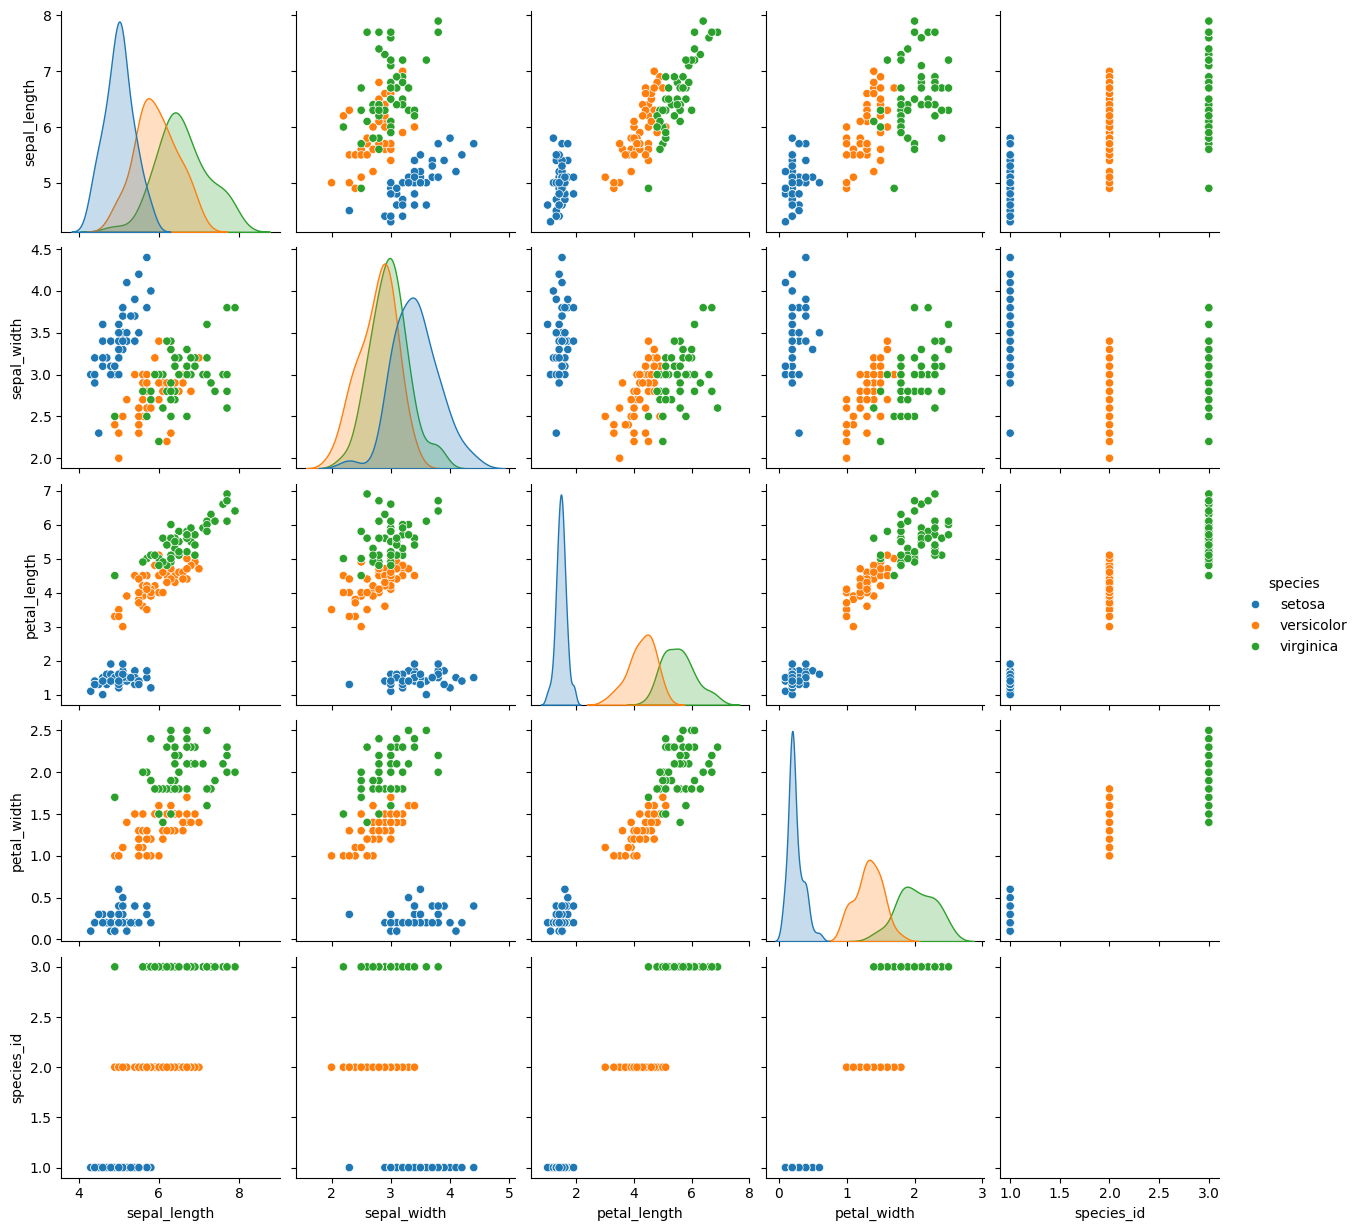

In [7]:
import seaborn as sns
sns.pairplot(df,hue='species')

Project data into 2D with t-SNE and px.scatter

In [8]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

Project data into 3D with t-SNE and px.scatter_3d

In [9]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

!pip install umap-learn

In [10]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

